<a href="https://colab.research.google.com/github/dgatti/PortfolioBigData/blob/main/salary_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSciencieICES/Salary_Data.csv')

ParserError: ignored

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


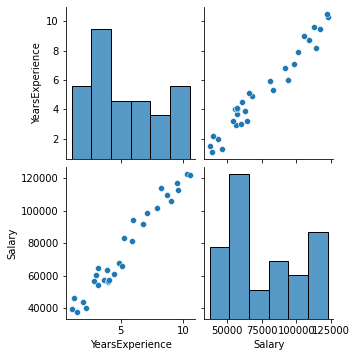

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#Regresion Lineal Simple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [ ]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
#dividimos los datos en el conjunto de entrenamiento y el conjunto de pruebas
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

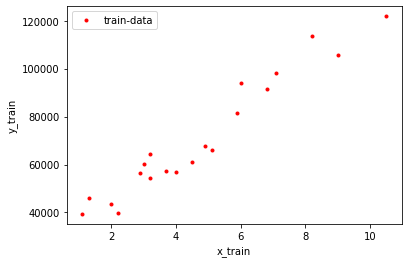

In [ ]:
# visualizando los datos de entrenamiento
plt.plot(x_train,y_train,'r.',label='Datos de entrenamiento')
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.legend()
plt.show()

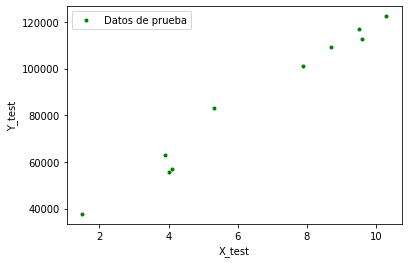

In [ ]:
# visualizando los datos de prueba
plt.plot(x_test,y_test,'g.',label='Datos de prueba')
plt.xlabel('X_test')
plt.ylabel('Y_test')
plt.legend()
plt.show()

In [ ]:
#Cargamos el conjunto de entrenamiento al modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

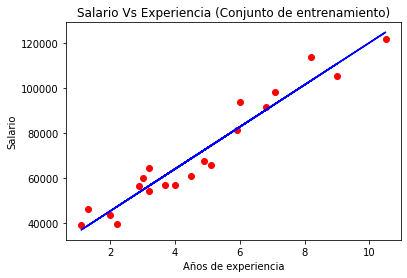

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Salario Vs Experiencia (Conjunto de entrenamiento)')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
#Predicción de los resultados del conjunto de pruebas (x_test)
y_pred = regressor.predict(x_test)



In [ ]:
calculation = pd.DataFrame(np.c_[y_test,y_pred], columns = ['Salario Original','Salario Predicho'])
calculation

,Salario Original,Salario Predicho
0,37731.0,40835.105909
1,122391.0,123079.399408
2,57081.0,65134.556261
3,63218.0,63265.367772
4,116969.0,115602.645454
5,109431.0,108125.891499
6,112635.0,116537.239698
7,55794.0,64199.962017
8,83088.0,76349.687193
9,101302.0,100649.137545


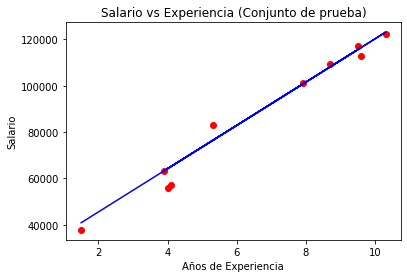

In [ ]:
#Ahora comparamos y_pred con los valores reales y_test
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Salario vs Experiencia (Conjunto de prueba)')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario')
plt.show()

In [ ]:
regressor.predict([[5.5]])

array([78218.8756812])

In [ ]:
print("Coefficents :",regressor.coef_)
print("Intercept :",regressor.intercept_)

Coefficents : [9345.94244312]
Intercept : 26816.192244031183


In [ ]:
y = 9345.94*1.5 +  26816.19



In [ ]:
y

40835.1

In [ ]:
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
print("MSME:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("r2 SCORE:",r2_score(y_test,y_pred))

MSME: 21026037.329511296
RMSE: 4585.4157204675885
MAE: 3426.4269374307078
r2 SCORE: 0.9749154407708353
